In [7]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import pylab


/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [15]:
df = pd.read_csv('winequality-red.csv', sep = ';')

In [2]:
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [3]:
print(df.corr())

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

In [4]:
#Split the data into training and testing sets
from sklearn.cross_validation import train_test_split
Features = df[list(df.columns)[:-1]]
Quality = df['quality']
Features_train, Features_test, Quality_train, Quality_test = train_test_split(Features, Quality)

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    ols_model = sm.OLS(Quality_test, Features_test, missing='drop')
    ols_results = ols_model.fit()
    print(ols_results.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     3026.
Date:                Thu, 12 Apr 2018   Prob (F-statistic):               0.00
Time:                        00:09:42   Log-Likelihood:                -377.61
No. Observations:                 400   AIC:                             777.2
Df Residuals:                     389   BIC:                             821.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity            0.0353 

In [30]:
Quality_predictions = ols_results.predict(Features_test)

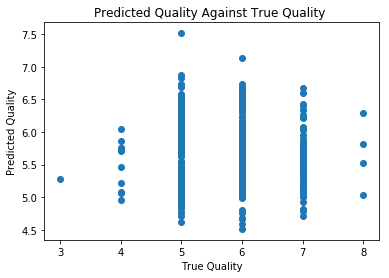

In [33]:
plt.scatter(Quality_test, Quality_predictions)
plt.xlabel('True Quality')
plt.ylabel('Predicted Quality')
plt.title('Predicted Quality Against True Quality ')
plt.show()

In [16]:
df2 = pd.read_csv('winequality-white.csv', sep = ';')

In [17]:
print(df2.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000         

In [18]:
White_Features = df[list(df.columns)[:-1]]
White_Quality = df['quality']
White_Features_train, White_Features_test, White_Quality_train, White_Quality_test = train_test_split(White_Features, White_Quality)

In [19]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    white_results = sm.OLS(White_Quality_test, White_Features_test, missing='drop')
    white_results = white_results.fit()
    print(white_results.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     2694.
Date:                Thu, 12 Apr 2018   Prob (F-statistic):               0.00
Time:                        00:16:00   Log-Likelihood:                -394.81
No. Observations:                 400   AIC:                             811.6
Df Residuals:                     389   BIC:                             855.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity            0.0136 

In [32]:
Quality_predictions = white_results.predict(White_Features_test)

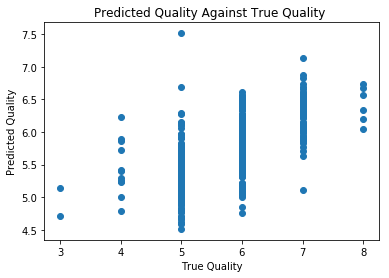

In [34]:
plt.scatter(White_Quality_test, White_Quality_predictions)
plt.xlabel('True Quality')
plt.ylabel('Predicted Quality')
plt.title('Predicted Quality Against True Quality ')
plt.show()